In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Step 1: Load the Graph from the GML File
gml_file = 'youtube_cyberbullying_graph.gml'
G = nx.read_gml(gml_file)

In [3]:
# Step 2: Convert the Graph into an Adjacency Matrix
A = nx.adjacency_matrix(G).toarray()  # Adjacency matrix for clustering

In [4]:
# Step 3: Preprocessing the Data for Clustering
# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(A)

# Normalizing the Data
X_normalized = normalize(X_scaled)

# Reducing the dimensions of the data using PCA for visualization
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

C:\Users\penda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_spectral.py:702: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\penda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (28). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


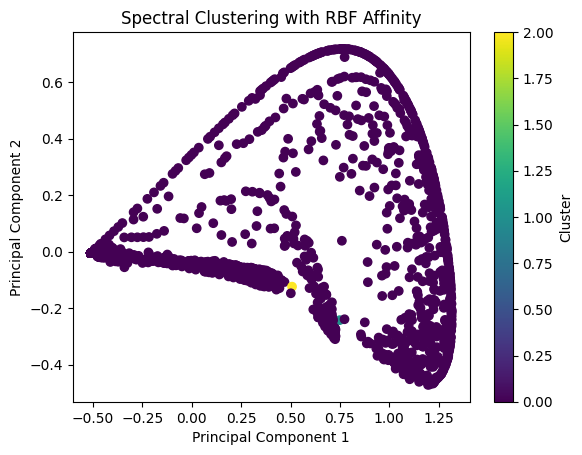

In [5]:
# Step 4: Apply Spectral Clustering with 'rbf' Affinity
spectral_model_rbf = SpectralClustering(n_clusters=28, affinity='rbf', random_state=42)
labels_rbf = spectral_model_rbf.fit_predict(A)

# Visualize the clustering with 'rbf'
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels_rbf, cmap=plt.cm.viridis)
plt.title("Spectral Clustering with RBF Affinity")
plt.colorbar(label="Cluster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [6]:
# Step 5: Apply Spectral Clustering with 'nearest_neighbors' Affinity
spectral_model_nn = SpectralClustering(n_clusters=28, affinity='nearest_neighbors', random_state=42)
labels_nn = spectral_model_nn.fit_predict(A)

C:\Users\penda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_spectral.py:702: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


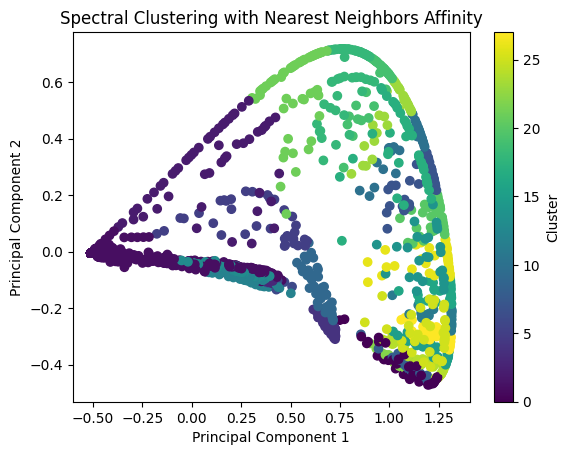

In [7]:
# Visualize the clustering with 'nearest_neighbors'
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels_nn, cmap=plt.cm.viridis)
plt.title("Spectral Clustering with Nearest Neighbors Affinity")
plt.colorbar(label="Cluster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

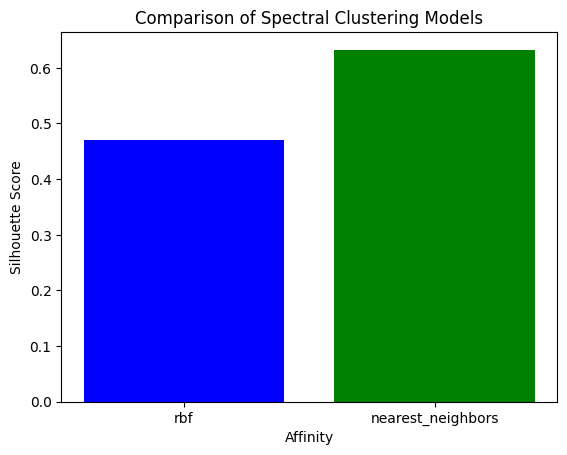

Silhouette Scores: [np.float64(0.4699403541323265), np.float64(0.6327971902265838)]


In [8]:
# Step 6: Evaluate and Compare the Models using Silhouette Score
# Compute Silhouette Scores
s_scores = []
s_scores.append(silhouette_score(A, labels_rbf, metric='euclidean'))
s_scores.append(silhouette_score(A, labels_nn, metric='euclidean'))

# Plotting the comparison
affinity = ['rbf', 'nearest_neighbors']
plt.bar(affinity, s_scores, color=['blue', 'green'])
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Spectral Clustering Models')
plt.show()

# Print Silhouette Scores
print("Silhouette Scores:", s_scores)

In [9]:
# Step 7: Save Cluster Assignments for Further Analysis
cluster_assignments = pd.DataFrame({
    'Node': list(G.nodes()),
    'RBF_Cluster': labels_rbf,
    'NN_Cluster': labels_nn
})
cluster_assignments.to_csv('spectral_clustering_assignments.csv', index=False)
print("Cluster assignments saved to 'spectral_clustering_assignments.csv'")

Cluster assignments saved to 'spectral_clustering_assignments.csv'
